Week 4 · Day 5 — Anomaly Detection
Why this matters

Anomaly detection finds rare or unusual data points. It’s critical in fraud detection, network security, manufacturing defect detection, and healthcare.

Theory Essentials

Goal: identify points that don’t follow the general pattern.

Approaches:

Statistical: flag values far from mean.

Distance-based: outliers are far from neighbors.

Model-based: learn normal regions and flag deviations.

Common methods in scikit-learn:

IsolationForest (tree-based, efficient).

OneClassSVM (boundary around normal data).

LocalOutlierFactor (density-based).

Important: anomalies are usually rare → class imbalance matters.

Notes / Key Takeaways

Anomalies = rare/unusual points, important in real-world systems.

🔹 1. Isolation Forest

Idea: Anomalies are easier to isolate than normal points.

Builds many random decision trees:

Pick a random feature, random split.

Measure how many splits (path length) are needed to isolate a point.

Normal points → deep in the tree (need many splits).

Anomalies → isolated quickly (short paths).

✅ Works well on high-dimensional data, scalable.

⚠️ Randomness means results can vary, but stable with enough trees.

🔹 2. One-Class SVM

Idea: Learn a boundary around the “normal” region of the data.

Uses kernel trick (like SVM for classification) to find a hypersphere or hyperplane that encloses most data.

Points outside this boundary = anomalies.

✅ Good when “normal” class is compact and well-defined.

⚠️ Sensitive to kernel choice, scaling, and doesn’t scale well to very large datasets.

🔹 3. Local Outlier Factor (LOF)

Idea: Compare local density of each point to its neighbors.

A point is an outlier if its neighborhood is much less dense than nearby regions.

✅ Captures local anomalies (e.g., a point that looks fine globally but is weird relative to its neighbors).

⚠️ More sensitive to parameter n_neighbors, not great on very high-dimensional data.

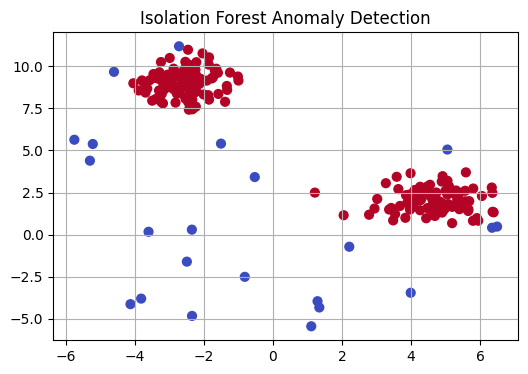

In [1]:
# Setup
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

# Create synthetic dataset
X, _ = make_blobs(n_samples=200, centers=2, cluster_std=0.8, random_state=42)
# Add some anomalies
X = np.vstack([X, np.random.uniform(low=-6, high=6, size=(20,2))])

# Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
labels_iso = iso.fit_predict(X)  # -1 = anomaly, 1 = normal

# Plot
plt.scatter(X[:,0], X[:,1], c=labels_iso, cmap="coolwarm", s=40)
plt.title("Isolation Forest Anomaly Detection")
plt.show()


Exercises

1) Core (10–15 min)
Task: Change contamination to 0.05 and 0.2. Compare how many points are flagged as anomalies.

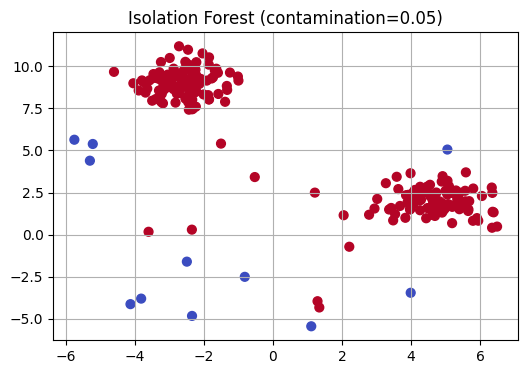

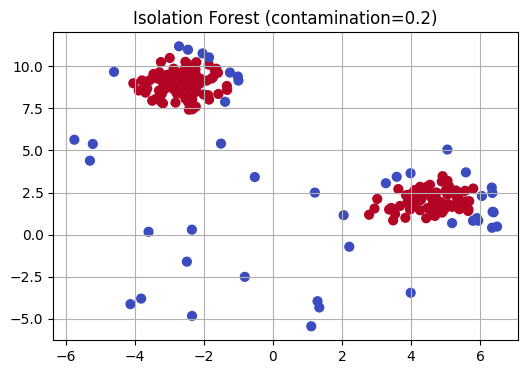

In [2]:
for c in [0.05,0.2]:
    iso = IsolationForest(contamination=c, random_state=42)
    labels = iso.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="coolwarm", s=40)
    plt.title(f"Isolation Forest (contamination={c})")
    plt.show()


2) Practice (10–15 min)
Task: Try OneClassSVM and compare results to Isolation Forest.

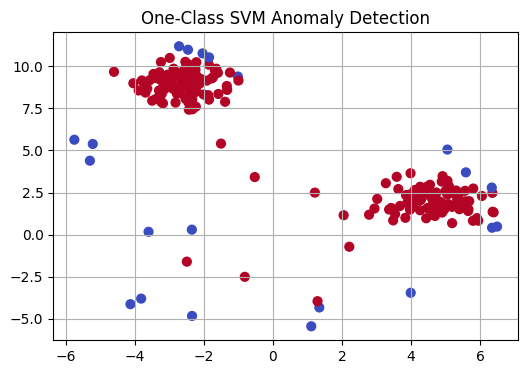

In [3]:
svm = OneClassSVM(kernel="rbf", nu=0.1, gamma="scale")
labels_svm = svm.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_svm, cmap="coolwarm", s=40)
plt.title("One-Class SVM Anomaly Detection")
plt.show()


3) Stretch (optional, 10–15 min)
Task: Use LocalOutlierFactor to detect anomalies. Compare visually.

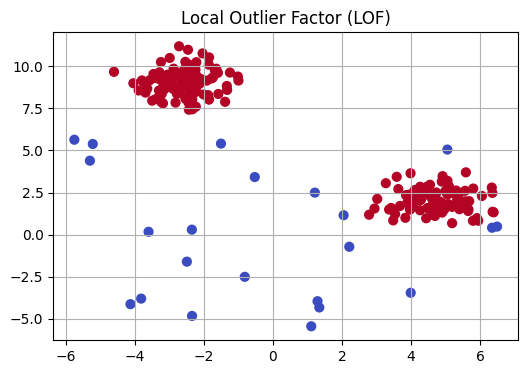

In [4]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
labels_lof = lof.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_lof, cmap="coolwarm", s=40)
plt.title("Local Outlier Factor (LOF)")
plt.show()


Mini-Challenge (≤40 min)

Task: Apply anomaly detection on the Iris dataset.
Acceptance Criteria:

Use IsolationForest.

Detect anomalies in the full feature space.

Print how many points are flagged as anomalies.

Plot sepal length vs sepal width, coloring anomalies differently.

Anomalies flagged: 15 out of 150


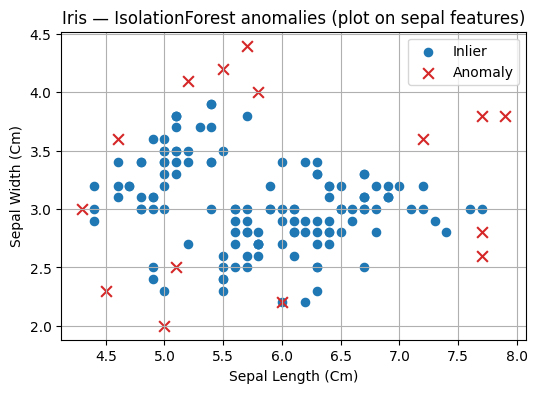

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

iso = IsolationForest(contamination=0.1, random_state=42)

pred = iso.fit_predict(X)         # 1 = inlier, -1 = outlier
scores = iso.decision_function(X) # higher = more normal, lower = more anomalous

# 3) Count anomalies
n_anom = np.sum(pred == -1)
print(f"Anomalies flagged: {n_anom} out of {len(X)}")

# 4) Plot sepal length vs sepal width, color anomalies differently
ix_len, ix_wid = 0, 1            # indices for sepal length/width
inliers = pred == 1
outliers = pred == -1

plt.scatter(X[inliers, ix_len], X[inliers, ix_wid], s=35, c="tab:blue", label="Inlier")
plt.scatter(X[outliers, ix_len], X[outliers, ix_wid], s=60, c="tab:red", marker="x", label="Anomaly")
plt.xlabel(feature_names[ix_len].title())
plt.ylabel(feature_names[ix_wid].title())
plt.title("Iris — IsolationForest anomalies (plot on sepal features)")
plt.legend()

Reflection

Why is anomaly detection harder than standard classification?

Why is choosing the contamination rate tricky in practice?

Why is anomaly detection harder than standard classification?

In classification we have labeled data, so models learn directly from examples.

In anomaly detection, labels are usually missing and anomalies are rare, making evaluation harder.

Anomalies can look very different depending on context, so there’s no single clear “pattern” to learn.

Why is choosing the contamination rate tricky in practice?

In real data, the true fraction of anomalies is often unknown.

If the contamination rate is set too low, many anomalies will be missed; too high, too many normal points will be flagged.

The “right” rate depends on domain knowledge and the acceptable balance between false alarms and missed detections.